# mount drive/ import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.BuPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(15, 15))
    ax = plt.axes()
    
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
!wget -nc https://github.com/Nadiam75/DeepLearning_HW_2/raw/main/bird.jpg


File ‘bird.jpg’ already there; not retrieving.



In [11]:
import tensorflow as tf  

# Display the version
print(tf.__version__)    
import numpy as np
from PIL import Image


import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import cv2
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint   
import time
from sklearn.model_selection import train_test_split
from keras.models import load_model 
# from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


2.7.0


#augmentation on test image

In [12]:
# datagen = ImageDataGenerator()
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

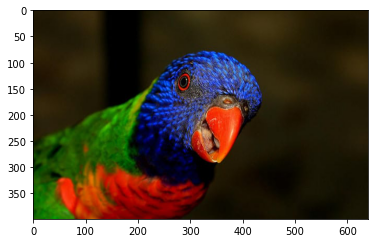

In [13]:
# use opencv to load the image
# image = cv2.imread('bird.jpg')
im = Image.open('bird.jpg') 
pixels = np.asarray(im)
plt.imshow(pixels)
# This method will show image in any image viewer 
# convert it to numpy array
# pixels = np.array(image)
# plt.imshow(pixels)
# plt.show()

# x  = img_to_array(pixels)
# type(x)
# type(pixels)


In [14]:
!rm -d -f -r augmented
!mkdir augmented

In [15]:
x = img_to_array(pixels)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
augmented = np.zeros ((10 , 399 , 640 , 3))
it = datagen.flow(x, batch_size=1, save_to_dir = '/content/augmented' , save_prefix='bird_', save_format='jpeg')
for batch in it :
    augmented[i , : , : , : ] = batch
    i += 1
    if i > 9:
        break  # otherwise the generator would loop indefinitely

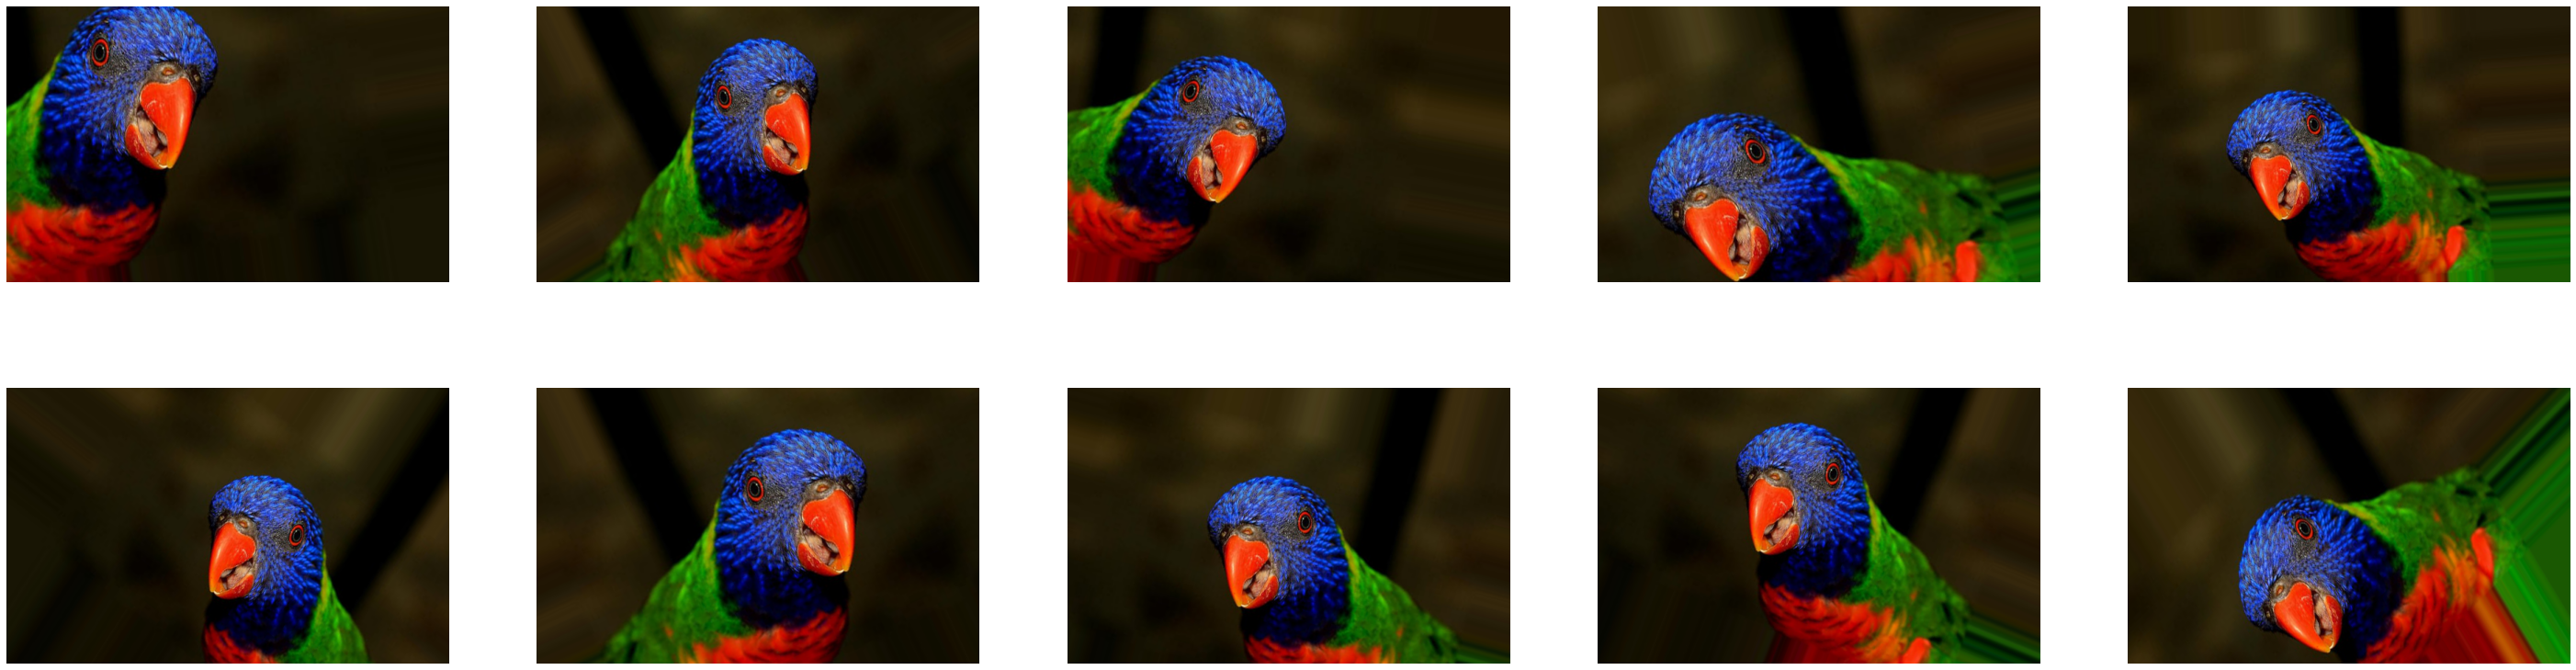

In [16]:
fig = plt.figure(figsize=(50, 14))

for i in range(10):
	# define subplot
	plt.subplot(2, 5, i+1)
	# plt.subplot(330 + 13 + i)
	# batch = it.next()
	# convert to unsigned integers for viewing
	image = augmented[i].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
	plt.axis('off')
plt.show()

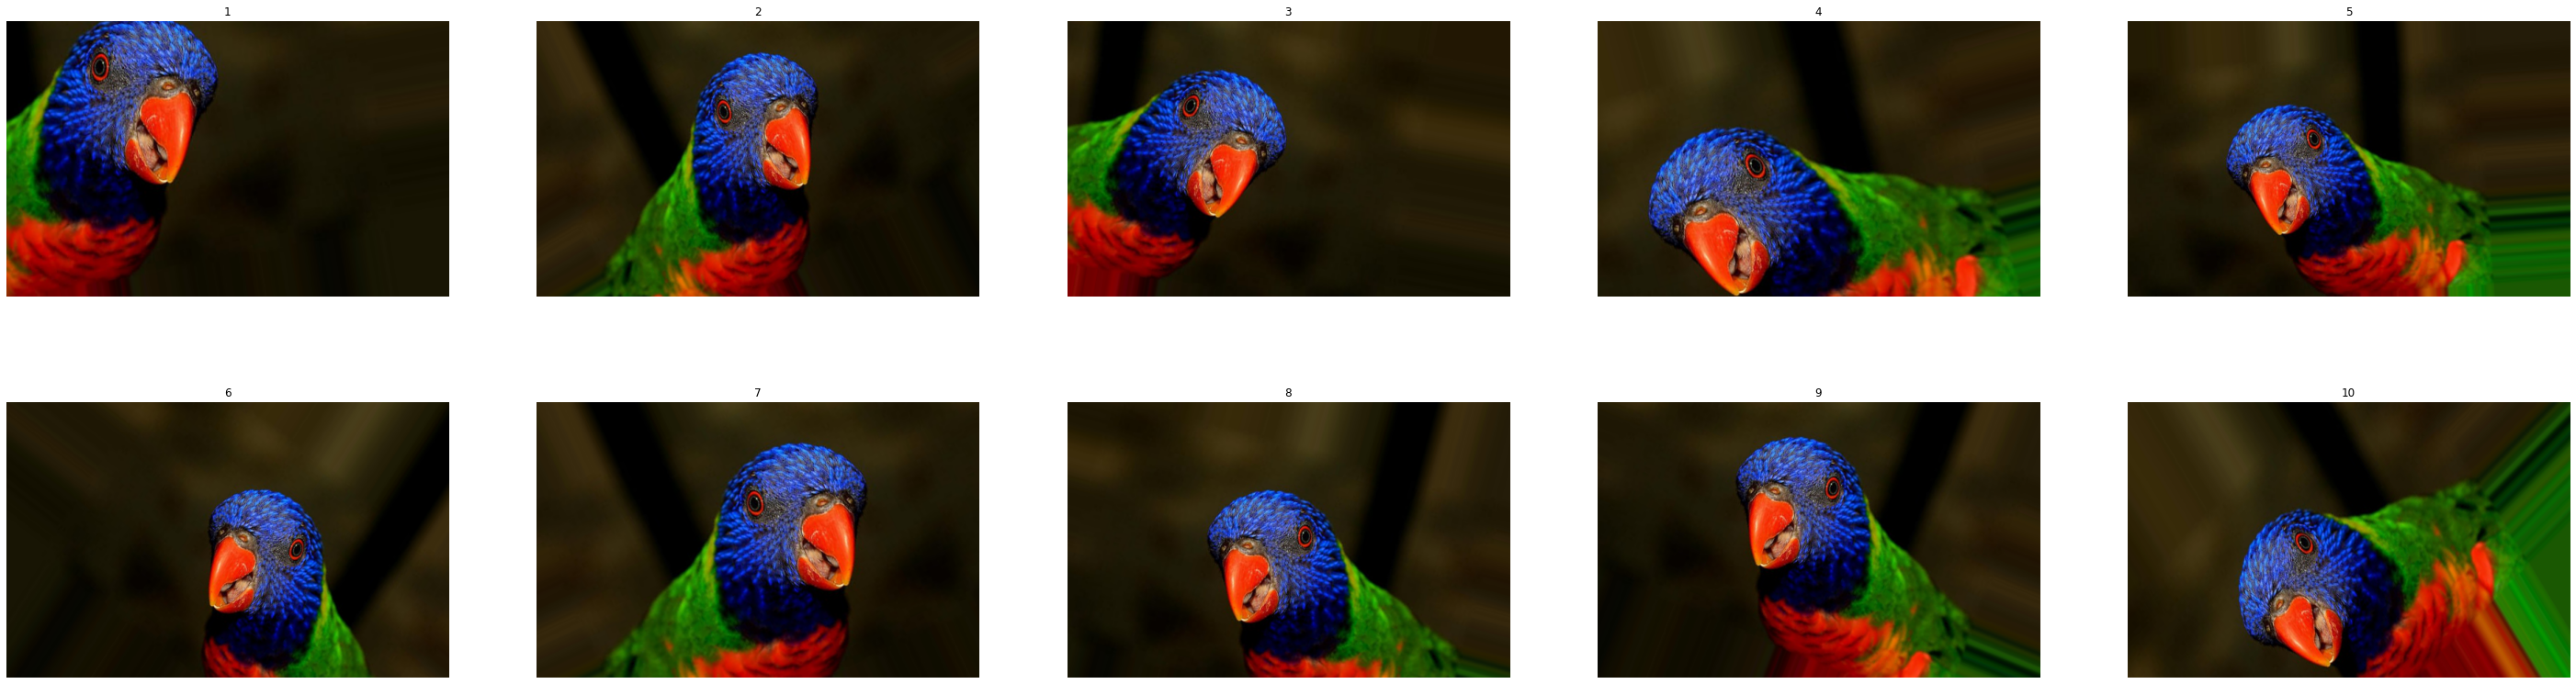

In [17]:
# code for displaying multiple images in one figure
  
#import libraries
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(50, 14))
plt.tight_layout()
# setting values to rows and column variables
rows = 2
columns = 5

for i in range(10):
# Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i+1)
  image = augmented[i].astype('uint8')
  
# showing image
  plt.imshow(image)
  plt.axis('off')
  plt.title(str(i+1))


In [18]:
dictionary = {0: 'airplane',
1: 'automobile',
2: 'bird',
3: 'cat',
4: 'deer',
5: 'dog',
6: 'frog',
7: 'horse',
8: 'ship',
9: 'truck'}

num_classes = 10

In [19]:
my_metrics =['accuracy' , 'Precision' , 'Recall'  ]


#training a model on CIFAR dataset

In [66]:
# load dataset
(X_train_0, Y_train_0), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_validation,  Y_train, Y_validation = train_test_split( X_train_0 , Y_train_0, test_size=0.33, random_state=42 )

In [67]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_validation = X_validation.astype('float32')

# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
X_validation = X_validation / 255.0

Y_validation_hot = tf.keras.utils.to_categorical(Y_validation, num_classes)
Y_train_hot = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test_hot = tf.keras.utils.to_categorical(Y_test, num_classes)

In [68]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics= my_metrics)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [25]:
lrate = 0.01 
decayMakhraj = 20
BS = 64
decay = lrate/decayMakhraj 
sgd = tf.keras.optimizers.SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False ) 
categorical_crossentropy = tf.keras.losses.categorical_crossentropy
model.compile(loss=categorical_crossentropy, optimizer=sgd, metrics= my_metrics)

In [26]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.6, min_denta=0.00001)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

In [27]:
start = time.time() # for stopwatch
history = model.fit(X_train, Y_train_hot, epochs=50, batch_size=BS, validation_data=(X_validation, Y_validation_hot), verbose=1 , 
                    shuffle=True   , callbacks = [ es, reduce_lr]    )
end = time.time() 
took = end -start
print("took %s seconds"%(took))

Epoch 1/50
524/524 [==============================] - 30s 37ms/step - loss: 1.9117 - accuracy: 0.3616 - precision: 0.4702 - recall: 0.2224 - val_loss: 1.7410 - val_accuracy: 0.4170 - val_precision: 0.4985 - val_recall: 0.3250 - lr: 0.0100
Epoch 2/50
524/524 [==============================] - 18s 33ms/step - loss: 1.4369 - accuracy: 0.4905 - precision: 0.6215 - recall: 0.3553 - val_loss: 1.1500 - val_accuracy: 0.5838 - val_precision: 0.7327 - val_recall: 0.4366 - lr: 0.0100
Epoch 3/50
524/524 [==============================] - 17s 33ms/step - loss: 1.2494 - accuracy: 0.5587 - precision: 0.6818 - recall: 0.4324 - val_loss: 1.0565 - val_accuracy: 0.6190 - val_precision: 0.7588 - val_recall: 0.4901 - lr: 0.0100
Epoch 4/50
524/524 [==============================] - 17s 33ms/step - loss: 1.1252 - accuracy: 0.5992 - precision: 0.7180 - recall: 0.4839 - val_loss: 1.0833 - val_accuracy: 0.6173 - val_precision: 0.7387 - val_recall: 0.5058 - lr: 0.0100
Epoch 5/50
524/524 [========================

In [73]:
acc = model.evaluate(X_test, Y_test_hot, verbose=1)


313/313 [==============================] - 4s 12ms/step - loss: 2.3028 - accuracy: 0.0944 - precision: 0.0000e+00 - recall: 0.0000e+00


In [69]:
acc = str(np.uint(np.floor(history.history['accuracy'][-1]*100)))
path = 'model_' + str(acc) + '.h5'
model.save(path)

In [71]:
Y_pred = model.predict(X_test)
y_pred_class = np.argmax(Y_pred, axis=1)
conf_matrix = tf.math.confusion_matrix(Y_test,y_pred_class)

In [42]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
dictionary = {0: 'airplane',
1: 'automobile',
2: 'bird',
3: 'cat',
4: 'deer',
5: 'dog',
6: 'frog',
7: 'horse',
8: 'ship',
9: 'truck'}

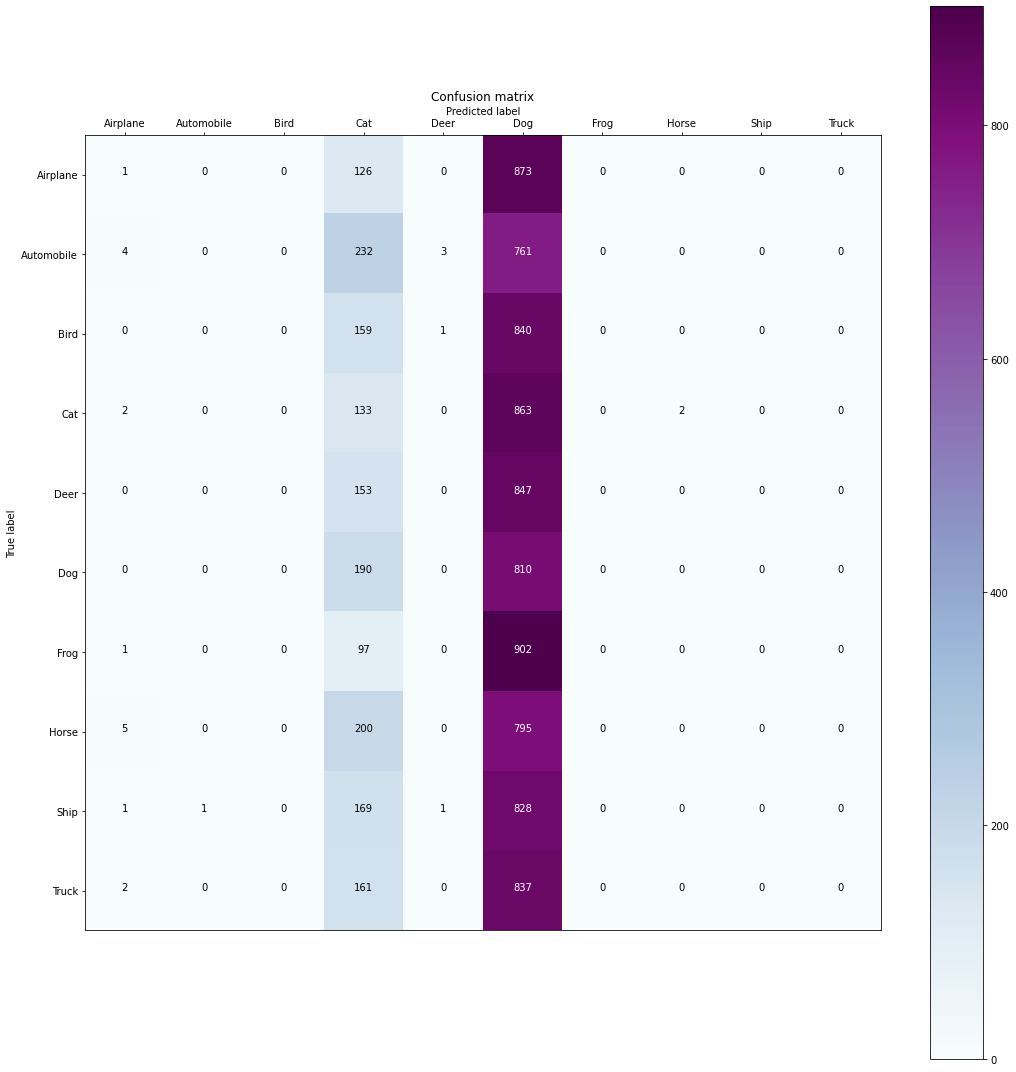

In [76]:
plot_confusion_matrix(np.array(conf_matrix), classes_name, normalize=False, title='Confusion matrix', cmap=plt.cm.BuPu)


# creating an imbalanced dataset

Text(0.5, 1.0, 'Class distribution in the original data set')

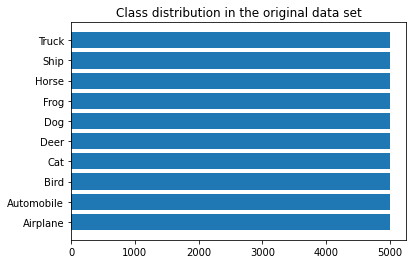

In [33]:
classes, counts = np.unique(Y_train_0, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in the original data set')

In [38]:
n_remove = 4500
chosenLabel = 3
numberOfSamples = len( Y_train_0 [Y_train_0 ==chosenLabel])
(indexes , _) = np.where (Y_train_0 ==chosenLabel) 
toRemove = np.random.choice(numberOfSamples, n_remove, replace=False)
Y_train_imbalanced_0 = np.delete(Y_train_0 ,  indexes[toRemove] , axis = 0)
X_train_imbalanced_0 = np.delete(X_train_0 ,  indexes[toRemove] , axis = 0)

In [39]:
chosenLabel = 5
numberOfSamples = len( Y_train_imbalanced_0 [Y_train_imbalanced_0 ==chosenLabel])
(indexes , _) = np.where (Y_train_imbalanced_0 ==chosenLabel) 
toRemove = np.random.choice(numberOfSamples, n_remove, replace=False)
Y_train_imbalanced__ = np.delete(Y_train_imbalanced_0 ,  indexes[toRemove] , axis = 0)
X_train_imbalanced__ = np.delete(X_train_imbalanced_0 ,  indexes[toRemove] , axis = 0)/255

Text(0.5, 1.0, 'Class distribution in the imbalanced dataset')

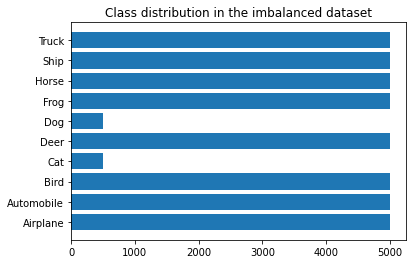

In [40]:
classes, counts = np.unique(Y_train_imbalanced__, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in the imbalanced dataset')

In [43]:
X_train_imbalanced, X_validation_imbalanced,  Y_train_imbalanced, Y_validation_imbalanced = train_test_split( X_train_imbalanced__ , Y_train_imbalanced__, test_size=0.33, random_state=42 )

Text(0.5, 1.0, 'training set distribution in the original data set')

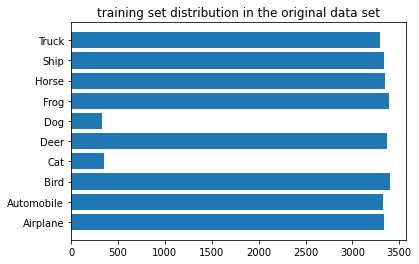

In [49]:
classes, counts = np.unique(Y_train_imbalanced, return_counts=True)
plt.barh(classes_name, counts)
plt.title('training set distribution in the original data set')

Text(0.5, 1.0, 'validation set distribution in the original data set')

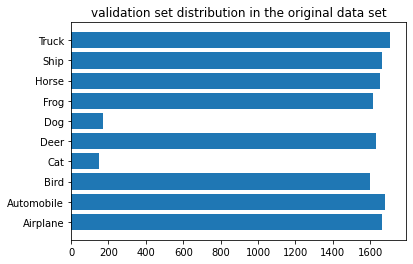

In [50]:
classes, counts = np.unique(Y_validation_imbalanced, return_counts=True)
plt.barh(classes_name, counts)
plt.title('validation set distribution in the original data set')

In [58]:
Y_validation_hot_imbalanced = tf.keras.utils.to_categorical(Y_validation_imbalanced, num_classes)
Y_train_hot_imbalanced = tf.keras.utils.to_categorical(Y_train_imbalanced, num_classes)


Text(0.5, 1.0, 'Class distribution in testing set')

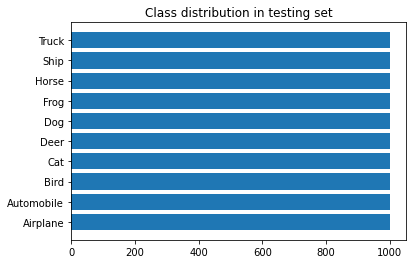

In [54]:
num_classes = 10
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
classes, counts = np.unique(Y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

#imbalanced model

In [55]:
imbalanced_model = Sequential()
imbalanced_model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
imbalanced_model.add(BatchNormalization())
imbalanced_model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
imbalanced_model.add(BatchNormalization())
imbalanced_model.add(MaxPooling2D())
imbalanced_model.add(Dropout(0.2))

imbalanced_model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
imbalanced_model.add(BatchNormalization())
imbalanced_model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
imbalanced_model.add(BatchNormalization())
imbalanced_model.add(MaxPooling2D())
imbalanced_model.add(Dropout(0.3))

imbalanced_model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
imbalanced_model.add(BatchNormalization())
imbalanced_model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
imbalanced_model.add(BatchNormalization())
imbalanced_model.add(MaxPooling2D())
imbalanced_model.add(Dropout(0.4))

imbalanced_model.add(Flatten())
imbalanced_model.add(Dense(1024, activation='relu'))
imbalanced_model.add(BatchNormalization())
imbalanced_model.add(Dropout(0.4))
imbalanced_model.add(Dense(512, activation='relu'))
imbalanced_model.add(BatchNormalization())
imbalanced_model.add(Dropout(0.4))
imbalanced_model.add(Dense(10, activation='softmax'))

imbalanced_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics= my_metrics)
imbalanced_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [59]:
lrate = 0.01 
decayMakhraj = 20
BS = 64
decay = lrate/decayMakhraj 
sgd = tf.keras.optimizers.SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False ) 
categorical_crossentropy = tf.keras.losses.categorical_crossentropy
imbalanced_model.compile(loss=categorical_crossentropy, optimizer=sgd, metrics= my_metrics)

In [60]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.6, min_denta=0.00001)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

In [62]:
start = time.time() # for stopwatch
history = imbalanced_model.fit(X_train_imbalanced, Y_train_hot_imbalanced, epochs=50, batch_size=BS, validation_data=(X_validation_imbalanced, Y_validation_hot_imbalanced), verbose=1 , 
                    shuffle=True   , callbacks = [ es, reduce_lr]    )
end = time.time() 
took = end -start
print("took %s seconds"%(took))

Epoch 1/50
430/430 [==============================] - 20s 39ms/step - loss: 1.8158 - accuracy: 0.4014 - precision: 0.4842 - recall: 0.2721 - val_loss: 1.4490 - val_accuracy: 0.4855 - val_precision: 0.5920 - val_recall: 0.3454 - lr: 0.0100
Epoch 2/50
430/430 [==============================] - 14s 33ms/step - loss: 1.3174 - accuracy: 0.5390 - precision: 0.6369 - recall: 0.4264 - val_loss: 1.1150 - val_accuracy: 0.6129 - val_precision: 0.7018 - val_recall: 0.5207 - lr: 0.0100
Epoch 3/50
430/430 [==============================] - 16s 37ms/step - loss: 1.1017 - accuracy: 0.6135 - precision: 0.7070 - recall: 0.5198 - val_loss: 0.9025 - val_accuracy: 0.6852 - val_precision: 0.7822 - val_recall: 0.5924 - lr: 0.0100
Epoch 4/50
430/430 [==============================] - 23s 53ms/step - loss: 0.9653 - accuracy: 0.6665 - precision: 0.7538 - recall: 0.5838 - val_loss: 0.8241 - val_accuracy: 0.7147 - val_precision: 0.7970 - val_recall: 0.6380 - lr: 0.0100
Epoch 5/50
430/430 [========================

In [80]:
acc = imbalanced_model.evaluate(X_test, Y_test_hot, verbose=1)

313/313 [==============================] - 3s 11ms/step - loss: 0.8276 - accuracy: 0.7526 - precision: 0.7892 - recall: 0.7294


In [81]:
acc = str(np.uint(np.floor(history.history['accuracy'][-1]*100)))
path = 'model_imbalanced_' + str(acc) + '.h5'
model.save(path)

In [82]:
Y_pred = imbalanced_model.predict(X_test)
y_pred_class = np.argmax(Y_pred, axis=1)
conf_matrix = tf.math.confusion_matrix(Y_test,y_pred_class)

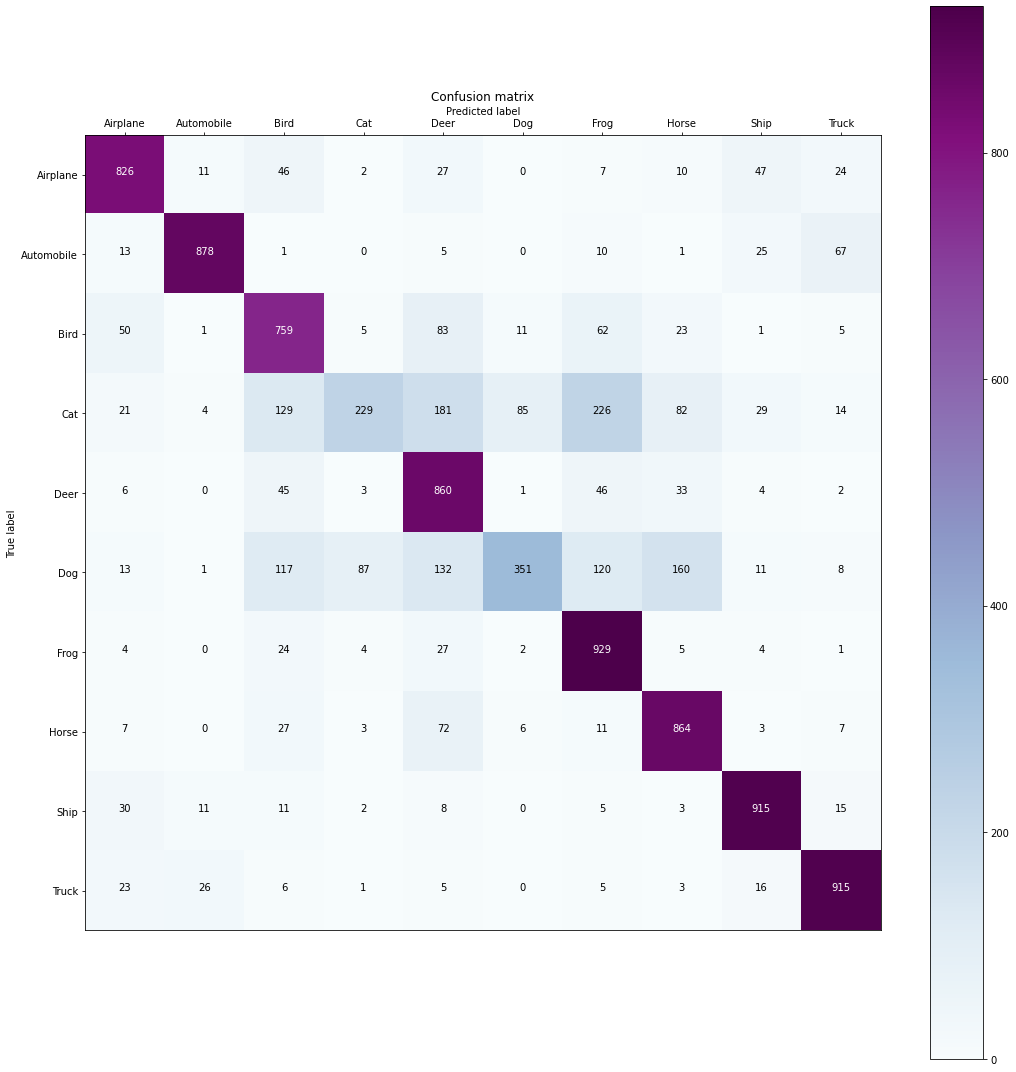

In [83]:
plot_confusion_matrix(np.array(conf_matrix), classes_name, normalize=False, title='Confusion matrix', cmap=plt.cm.BuPu)


#data augmentation